# Final Project
## Group 38
### Demographics EDA


This notebook will open the somewhat parsed data, reconstruct some missing columns from some year, and see if there are any trends or patterns in the data that warrant closer examination.

The initial goal is to see if the demographics of a congressional district can be combined with polls to accurately predict the winner.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "data/"
input_files = ["fin2012h.csv", "fin2014h.csv", "fin2016h.csv", "fin2018h.csv"]
dfs = []
for i in input_files:
    df = pd.read_csv("%s%s" % (data_dir, i))
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)

display(df.head())
df.tail()


,year,state,district,dem,rep,tot,allage_pop,allage_m,allage_f,allage_18plus,...,"Race,Black","Race,Latino","Race,Asian","Race,Other","Education,HS or less","Education,College Graduate","Education,Postgraduate",voteage_pop,voteage_m,voteage_f
0,2012,AK,1,82927,185296,289804,731449.0,381094.0,350355.0,544184.0,...,83,38,48,21,NaN,-6.0,12,NaN,NaN,NaN
1,2012,AL,1,0,196374,200676,693136.0,336325.0,356811.0,528601.0,...,83,38,48,21,NaN,-6.0,12,NaN,NaN,NaN
2,2012,AL,2,103092,180591,283953,683565.0,331111.0,352454.0,521540.0,...,83,38,48,21,NaN,-6.0,12,NaN,NaN,NaN
3,2012,AL,3,98141,175306,273930,696249.0,340523.0,355726.0,537313.0,...,83,38,48,21,NaN,-6.0,12,NaN,NaN,NaN
4,2012,AL,4,69706,199071,269118,680966.0,331717.0,349249.0,522030.0,...,83,38,48,21,NaN,-6.0,12,NaN,NaN,NaN


,year,state,district,dem,rep,tot,allage_pop,allage_m,allage_f,allage_18plus,...,"Race,Black","Race,Latino","Race,Asian","Race,Other","Education,HS or less","Education,College Graduate","Education,Postgraduate",voteage_pop,voteage_m,voteage_f
1743,2018,WI,8,119265,209410,328774,NaN,NaN,NaN,NaN,...,81,40,54,12,-3.0,12.0,31,556205.0,275043.0,281162.0
1744,2018,WV,1,70217,127997,198214,NaN,NaN,NaN,NaN,...,81,40,54,12,-3.0,12.0,31,486327.0,240272.0,246055.0
1745,2018,WV,2,88011,110504,204792,NaN,NaN,NaN,NaN,...,81,40,54,12,-3.0,12.0,31,487208.0,238345.0,248863.0
1746,2018,WV,3,76340,98645,174985,NaN,NaN,NaN,NaN,...,81,40,54,12,-3.0,12.0,31,457623.0,222773.0,234850.0
1747,2018,WY,1,59903,127963,201245,NaN,NaN,NaN,NaN,...,81,40,54,12,-3.0,12.0,31,433644.0,219788.0,213856.0


### Cleanup

The census data varied from year to year. Rebuild columns as best as can be done.


In [3]:
#display(df[['voteage_pop', 'voteage_m', 'voteage_f']])
#display(df[['allage_18plus','allage_citzenpct']])
#display(df[['race_pop', 'race_white', 'race_black', 'race_asian', 'race_hisp']])

#df.voteage_pop.fillna(df.allage_18plus * df.allage_citzenpct)
df.loc[df['voteage_pop'].isna(),'voteage_pop'] = (df.allage_18plus * df.allage_citzenpct / 100).round()
df.loc[df['voteage_m'].isna(),'voteage_m'] = (df.allage_m / df.allage_pop * df.voteage_pop).round()
df.loc[df['voteage_f'].isna(),'voteage_f'] = (df.allage_f / df.allage_pop * df.voteage_pop).round()

# other desired columns
df['demrepdiff'] = (df.dem - df.rep) / df.tot * 100
#df['dem_win'] = np.where(df['demrepdiff'] >= 0, True, False)
#df = df.assign(dem_win = (df['demrepdiff'] >= 0).astype(int))
df['dem_win'] = (df['demrepdiff'] / df['demrepdiff'].abs() + 1) / 2

df['voteage_m_pct'] = df.voteage_m / df.voteage_pop * 100
df['voteage_f_pct'] = df.voteage_f / df.voteage_pop * 100

df['race_white_pct'] = df.race_white / df.race_pop * 100
df['race_black_pct'] = df.race_black / df.race_pop * 100
df['race_asian_pct'] = df.race_asian / df.race_pop * 100
df['race_hisp_pct'] = df.race_hisp / df.race_pop * 100
df['race_other_pct'] = 100 - df.race_white_pct - df.race_black_pct - df.race_asian_pct - df.race_hisp_pct
df['race_other_pct'] = np.where(df['race_other_pct'] > 0, df['race_other_pct'], 0)


#display(df[['voteage_pop', 'voteage_m', 'voteage_f', 'voteage_m_pct', 'voteage_f_pct']])
#display(df[['voteage_pop', 'voteage_m', 'voteage_f', 'voteage_m_pct', 'voteage_f_pct']].describe())
#display(df[['race_pop', 'race_white', 'race_black', 'race_asian', 'race_hisp']].describe())
#display(df[['dem_win']].describe())

df.describe()

,year,district,dem,rep,tot,allage_pop,allage_m,allage_f,allage_18plus,allage_citzenpct,...,voteage_f,demrepdiff,dem_win,voteage_m_pct,voteage_f_pct,race_white_pct,race_black_pct,race_asian_pct,race_hisp_pct,race_other_pct
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,872.000000,...,1.746000e+03,1739.000000,1739.000000,1746.000000,1746.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,2015.000000,10.132723,121833.127002,120955.162471,254396.545767,7.322501e+05,3.601694e+05,3.720807e+05,5.618726e+05,55.003555,...,2.155239e+05,1.620649,0.466935,48.835831,51.164169,73.103665,13.908466,6.258630,17.612210,0.216545
std,2.236708,10.626651,64167.600255,65834.098501,77422.666576,1.428031e+05,6.855987e+04,7.493058e+04,1.121247e+05,10.051105,...,7.641138e+04,44.823461,0.499049,1.194046,1.194046,17.204711,14.303836,7.640805,18.441208,1.518583
min,2012.000000,1.000000,0.000000,0.000000,0.000000,5.165870e+05,2.479020e+05,2.686850e+05,4.157180e+05,31.900000,...,8.818700e+04,-100.000000,0.000000,43.100840,46.053384,12.494490,0.774824,0.215451,0.760629,0.000000
25%,2013.500000,3.000000,80746.000000,74515.000000,204239.750000,7.109572e+05,3.486905e+05,3.589048e+05,5.382302e+05,47.400000,...,1.539130e+05,-28.617249,0.000000,48.130221,50.373101,65.395119,4.562227,2.069820,5.151021,0.000000
50%,2015.000000,6.000000,119070.500000,124787.500000,261610.000000,7.239745e+05,3.563515e+05,3.680775e+05,5.589480e+05,54.900000,...,2.078340e+05,-5.744382,0.000000,48.894550,51.105450,77.135944,8.617785,3.637492,10.788760,0.000000
75%,2016.500000,13.000000,162847.500000,171798.250000,310935.250000,7.432828e+05,3.666605e+05,3.795478e+05,5.750750e+05,62.200000,...,2.765220e+05,32.470905,1.000000,49.626899,51.869779,86.405961,17.388084,7.173670,22.074174,0.000000
max,2018.000000,53.000000,378754.000000,293684.000000,507831.000000,3.667084e+06,1.757273e+06,1.909811e+06,2.817723e+06,80.900000,...,1.424957e+06,100.000000,1.000000,53.946616,56.899160,97.021745,68.356571,68.133729,99.038495,23.018678


### Show attribute relationships

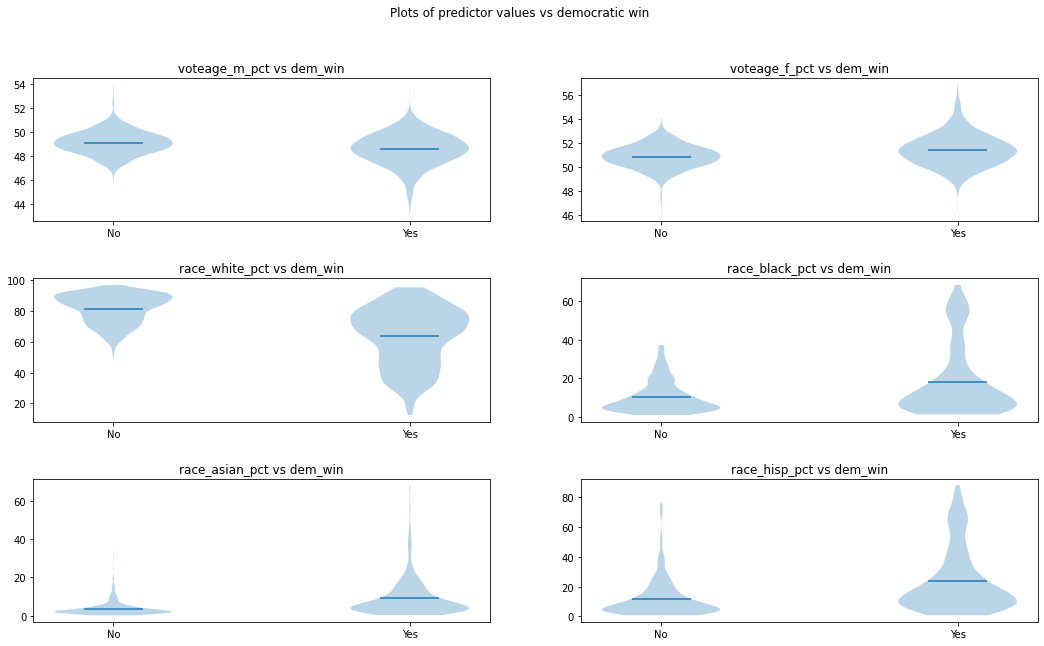

In [4]:
# your code here

preds = ['voteage_m_pct', 'voteage_f_pct',
         'race_white_pct', 'race_black_pct', 'race_asian_pct', 'race_hisp_pct']

#print(df[['voteage_m_pct', 'dem_win']][100:150])

# create a plot for given axes
# args: ax = ax graphing object, n = index of graph, p = predictor name, y = response name,
#       X = data frame with p and y
def plot_violin(ax, n, p, y, X):
    X0 = X.loc[X[y] == False]
    X1 = X.loc[X[y] == True]
    ax[n].violinplot([X0[p].values, X1[p].values], [False,True],
                     widths=0.4, showmeans=True, showextrema=False, showmedians=False);
    ax[n].set_xticks([0.0, 1.0])
    ax[n].set_xticklabels(['No', 'Yes'])
    ax[n].set_title(f'{p} vs {y}')
    return

fig, ax = plt.subplots(3,2, figsize = (18,10))
ax = ax.ravel()
for n, p in enumerate(preds):
    plot_violin(ax, n, p, 'dem_win', df)

fig.suptitle('Plots of predictor values vs democratic win')
fig.subplots_adjust(hspace=0.4)
plt.show()


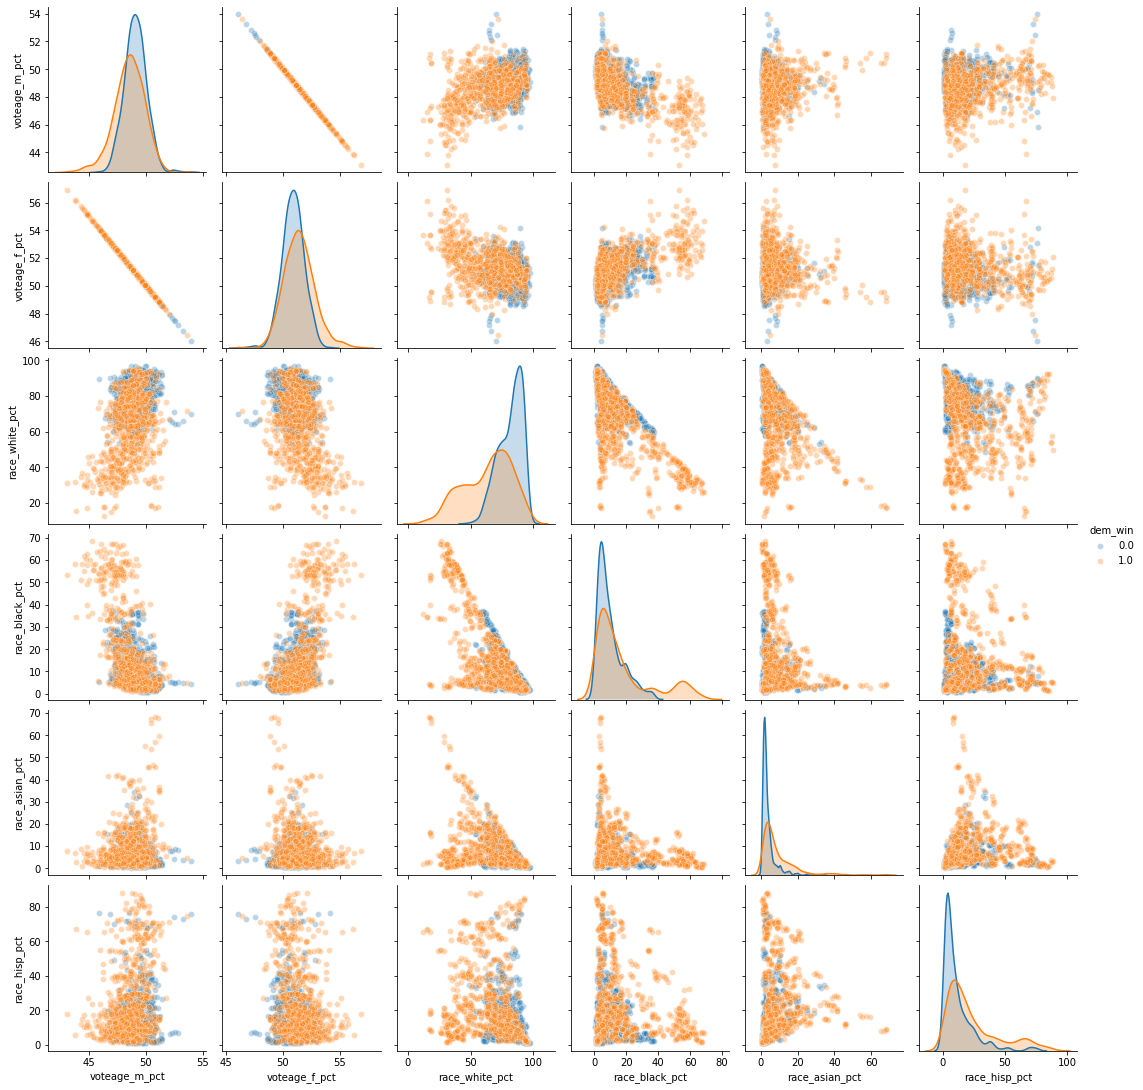

In [5]:

sns.pairplot(df, vars=preds, hue='dem_win',
             plot_kws=dict(alpha=0.3))

### Add in polling numbers

In [6]:
# add columns with demographic size and polling preference

df['voteage_m_pref'] = df.voteage_m_pct * df["Gender,Male"] / 100
df['voteage_f_pref'] = df.voteage_f_pct * df["Gender,Female"] / 100
df['voteage_sex_pref'] = (df.voteage_m_pct * df["Gender,Male"] +
    df.voteage_f_pct * df["Gender,Female"]) / 100

df['race_white_pref'] = df.race_white_pct * df["Race,White"] / 100
df['race_black_pref'] = df.race_black_pct * df["Race,Other"] / 100
df['race_asian_pref'] = df.race_asian_pct * df["Race,Asian"] / 100
df['race_hisp_pref'] = df.race_hisp_pct * df["Race,Latino"] / 100
df['race_other_pref'] = df.race_hisp_pct * df["Race,Latino"] / 100
df['race_pref'] = (df['race_white_pref'] + df['race_black_pref'] +
     df['race_asian_pref'] + df['race_hisp_pref'] + df['race_other_pref'])  / 100

#df.describe()

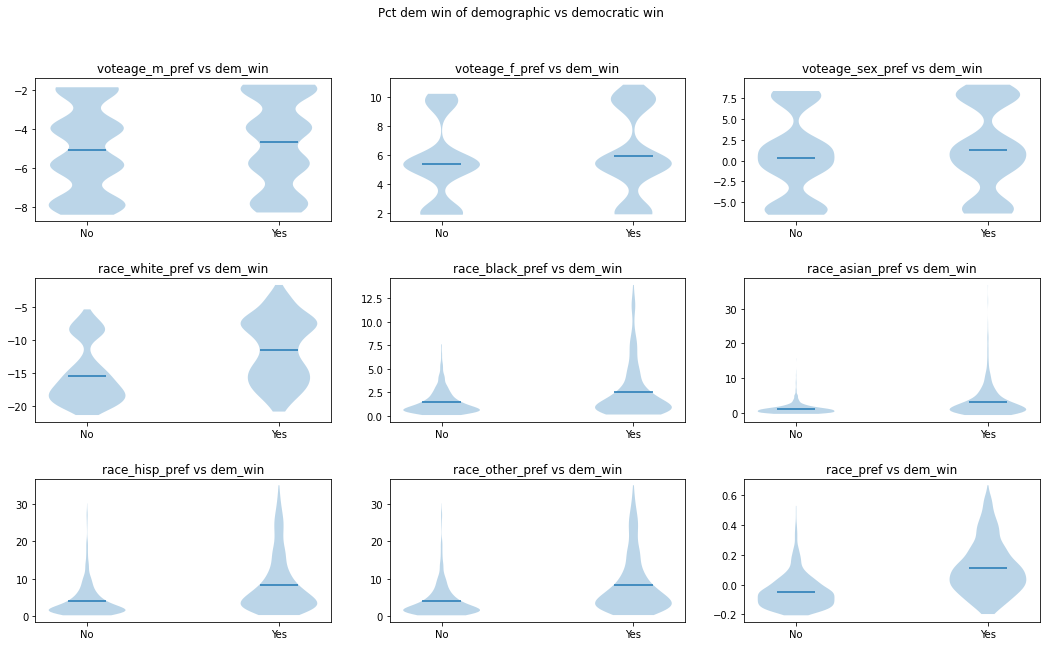

In [7]:
preds2 = ['voteage_m_pref', 'voteage_f_pref', 'voteage_sex_pref',
          'race_white_pref', 'race_black_pref', 'race_asian_pref',
          'race_hisp_pref', 'race_other_pref', 'race_pref']


fig, ax = plt.subplots(3,3, figsize = (18,10))
ax = ax.ravel()
for n, p in enumerate(preds2):
    plot_violin(ax, n, p, 'dem_win', df)

fig.suptitle('Pct dem win of demographic vs democratic win')
fig.subplots_adjust(hspace=0.4)
plt.show()


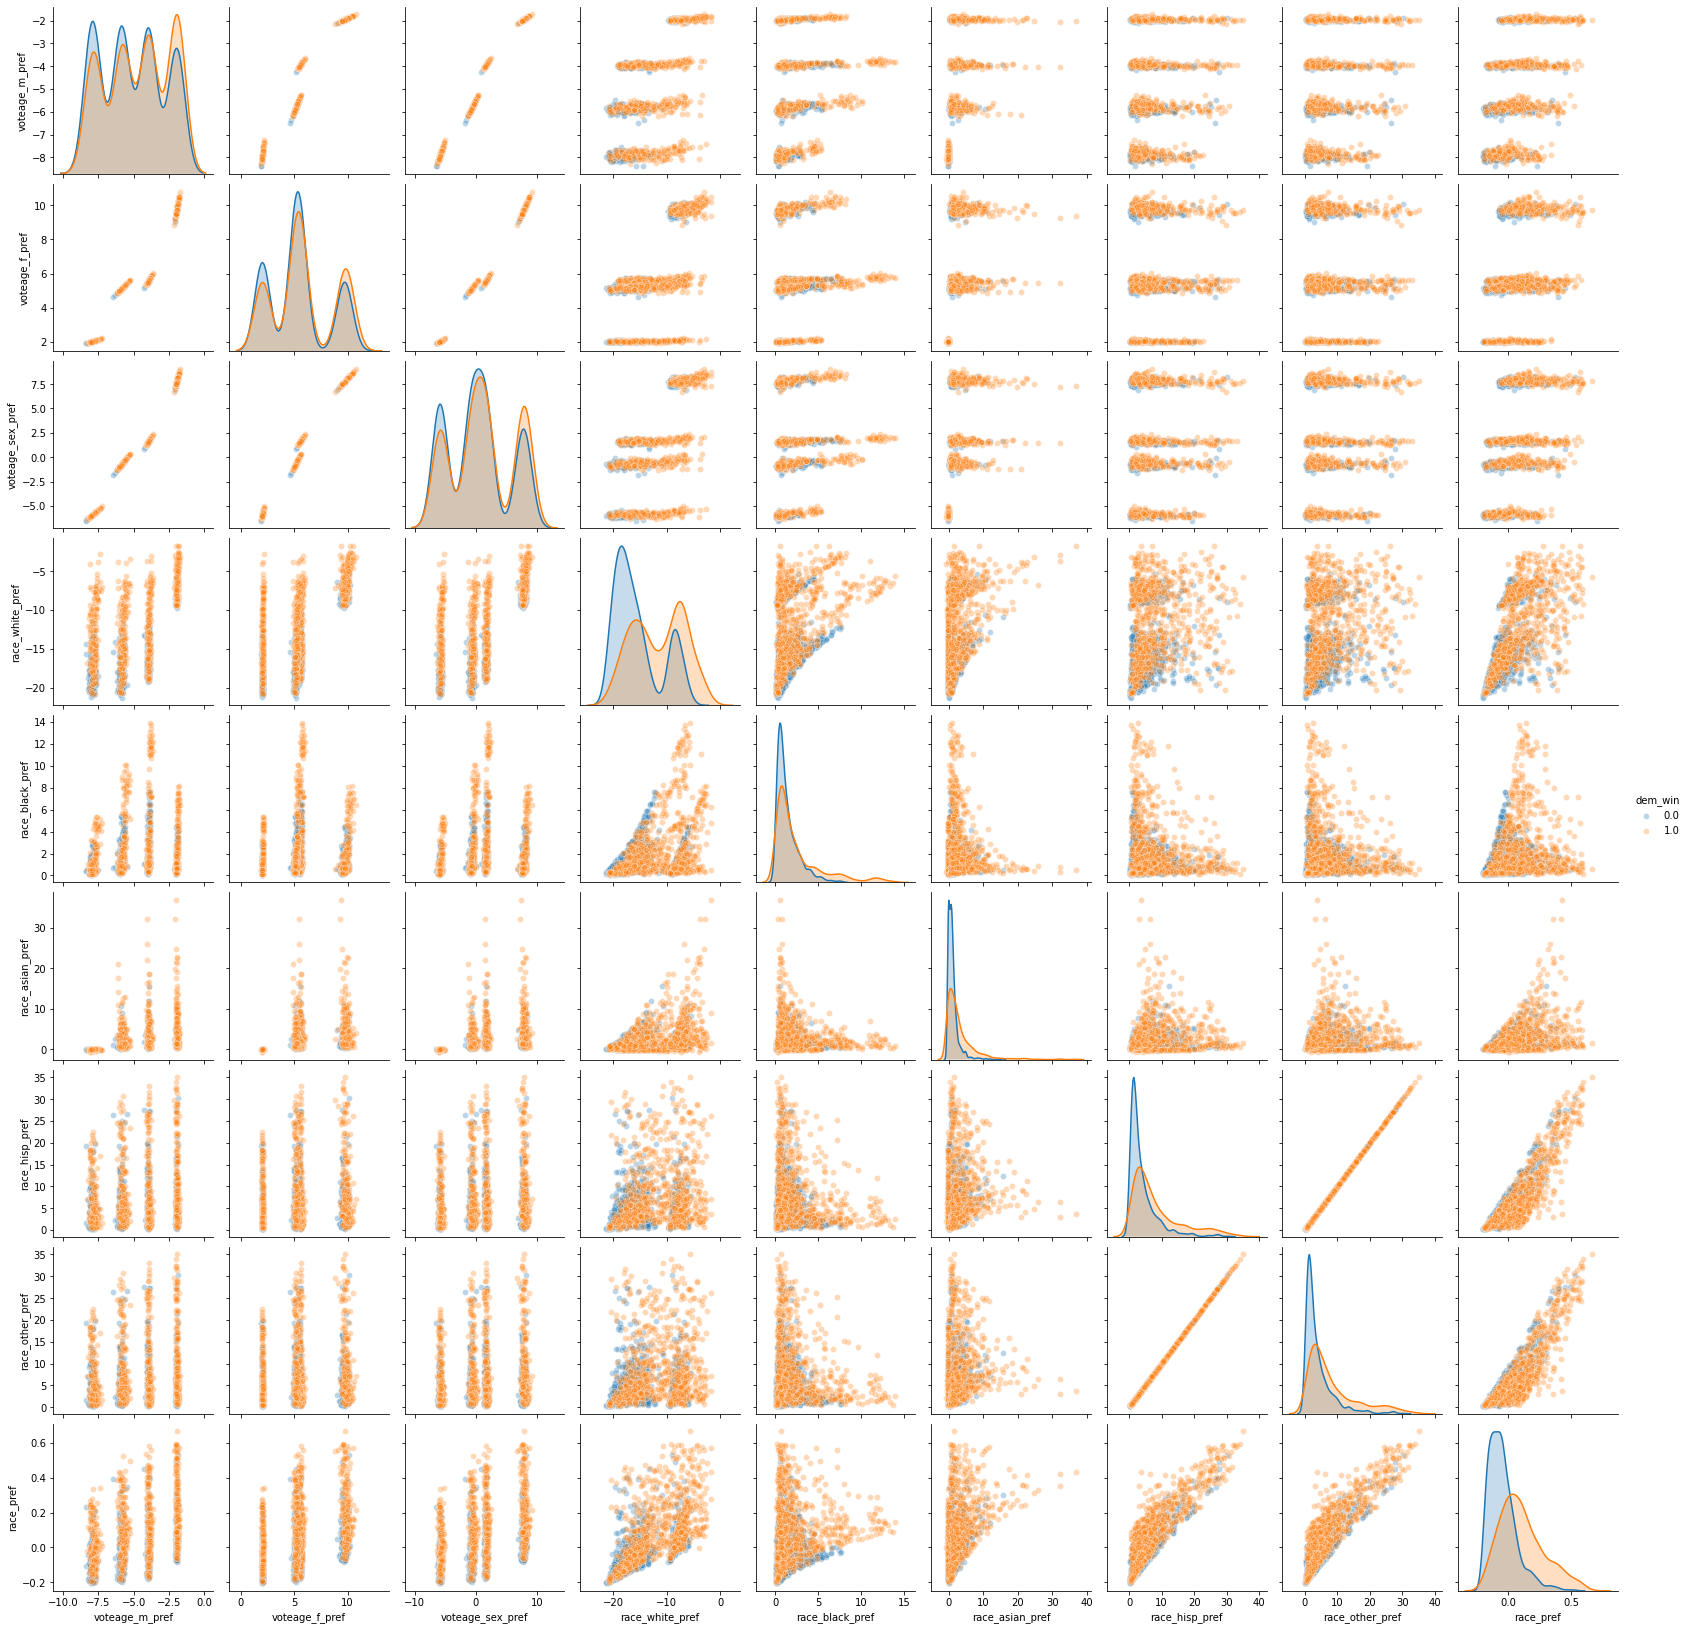

In [8]:
sns.pairplot(df, vars=preds2, hue='dem_win',
             plot_kws=dict(alpha=0.3))

In [9]:
preds3 = preds + preds2

In [10]:
notworking = """

fig, ax = plt.subplots(5,3, figsize = (18,10))
ax = ax.ravel()
for i in range(len(preds3)):
    sns.kdeplot(df[preds3[i]], df['dem_win'], ax=ax[i])
    #ax[i].set_yticks([0.0, 1.0])
    #ax[i].set_yticklabels(['Rep', 'Dem'])
    break
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Plots of feature histograms of winning party')
plt.show()
"""

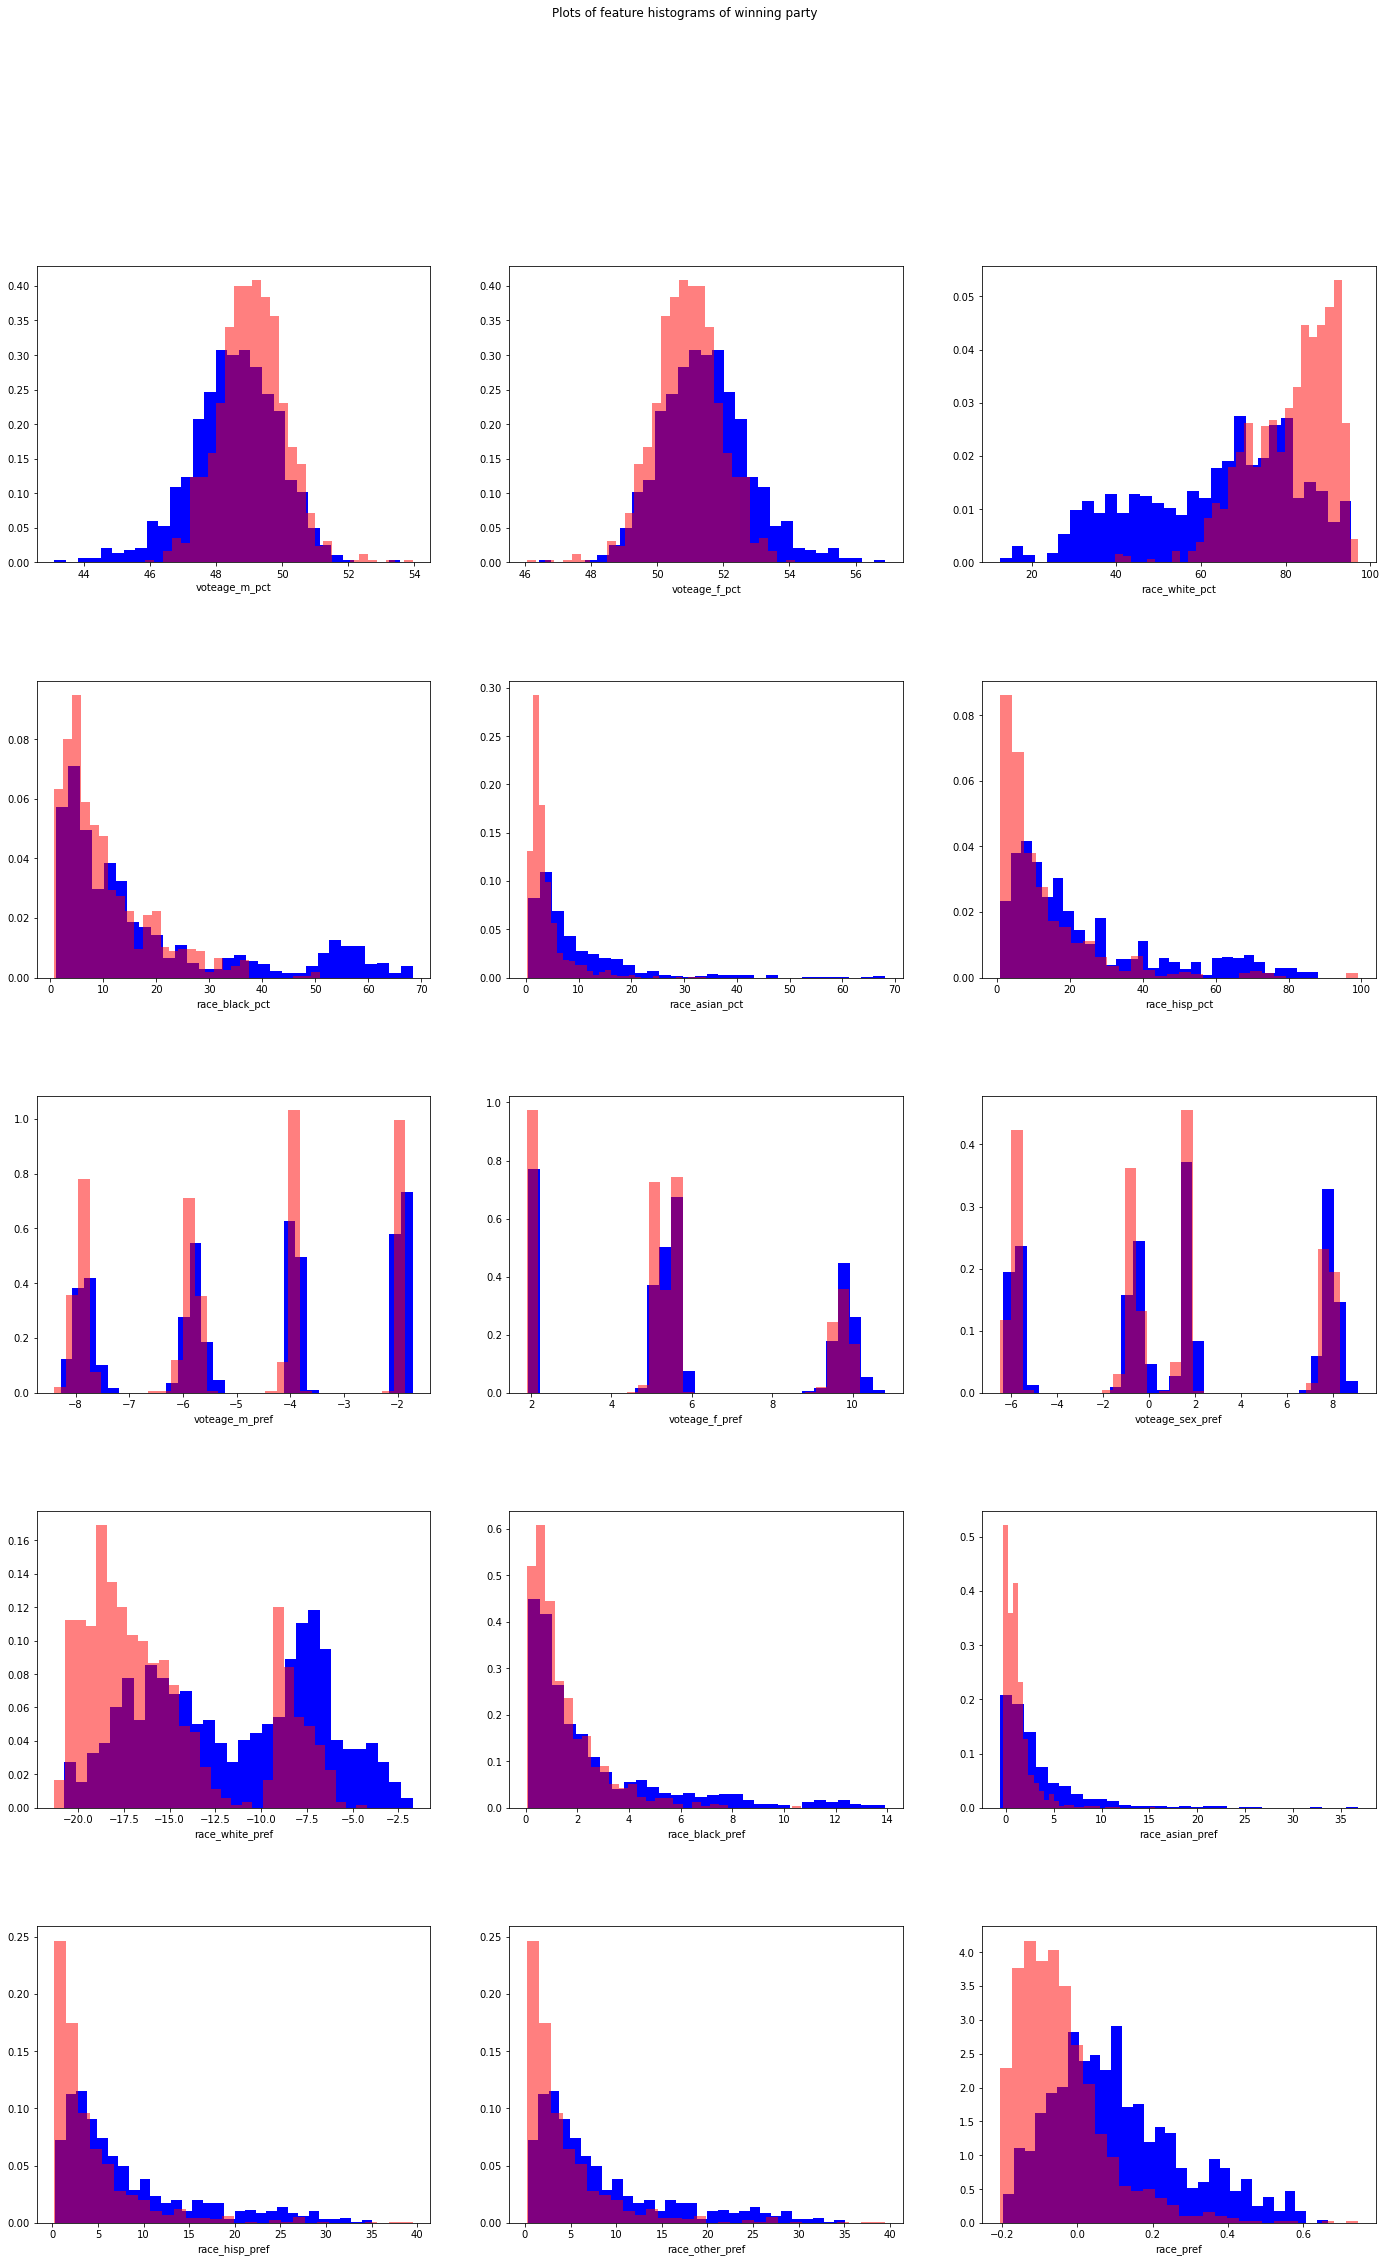

In [11]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(24,36))
ax = axs.ravel()
for i in range(len(preds3)):
    ax[i].hist(df.loc[df['dem_win'] == 1][preds3[i]], 30, density=True, color='blue')
    ax[i].hist(df.loc[df['dem_win'] != 1][preds3[i]], 30, density=True, color='red', alpha=0.5)
    ax[i].set_xlabel(preds3[i])
    #break
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Plots of feature histograms of winning party')
plt.show()


### By magnitude of win (vote difference)

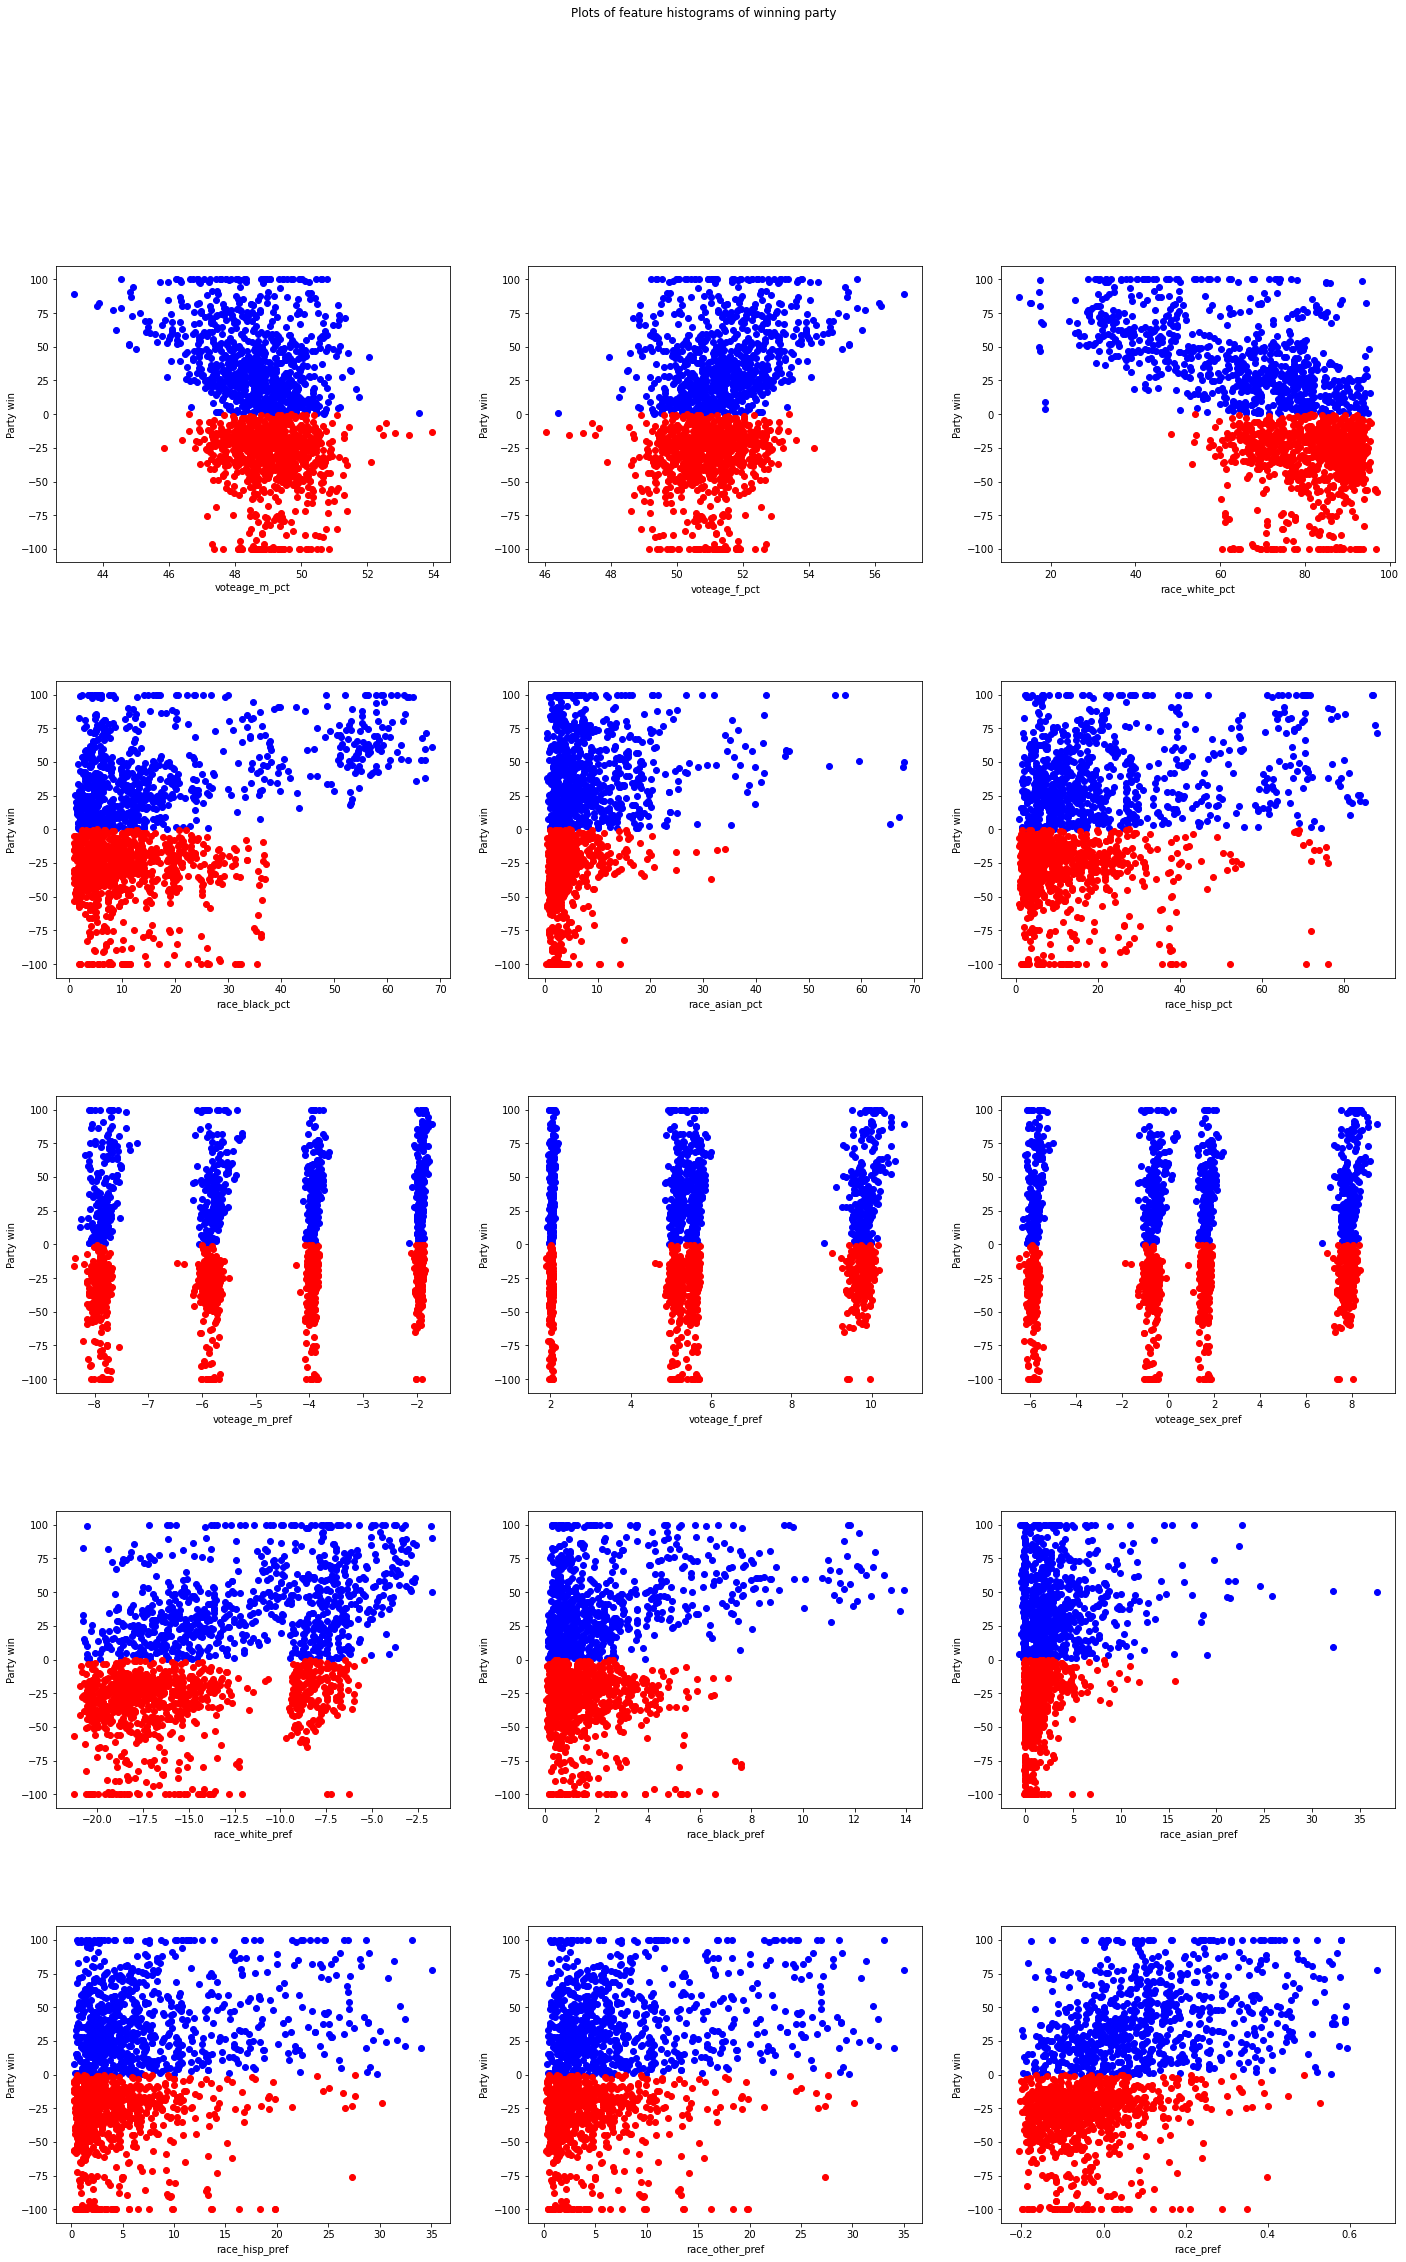

In [12]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(24,36))
ax = axs.ravel()
dfD = df.loc[df['dem_win'] == 1]
dfR = df.loc[df['dem_win'] != 1]

for i in range(len(preds3)):
    ax[i].scatter(dfD[preds3[i]], dfD['demrepdiff'], color='blue')
    ax[i].scatter(dfR[preds3[i]], dfR['demrepdiff'], color='red')
    #ax[i].hist(df.loc[df['dem_win'] != 1][preds3[i]], 30, density=True, color='red', alpha=0.5)
    ax[i].set_xlabel(preds3[i])
    ax[i].set_ylabel('Party win')
    #break
fig.subplots_adjust(hspace=0.4)
fig.suptitle('Plots of feature histograms of winning party')
plt.show()
